# Learning note

- https://zhuanlan.zhihu.com/p/53277723
- https://www.jiqizhixin.com/articles/2018-10-29-10
- https://blog.csdn.net/qq_38888209/article/details/104398821
- https://github.com/brightmart/text_classification
- https://www.52nlp.cn/



## Ovewview

- 分词。好的分词算法很重要。
- 文本预处理。
- 标准化：单词的时态，单复数。都转换为最原始的。这时还是字符串。
- 特征提取：向量表示，thidf算法，w2w，seq2seq算法等等。
- 模型：向量有了，然后就是根据算法去匹配。

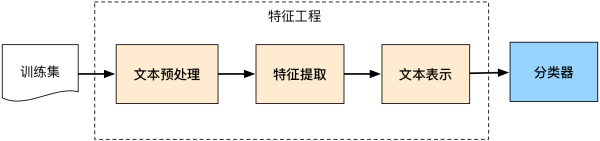
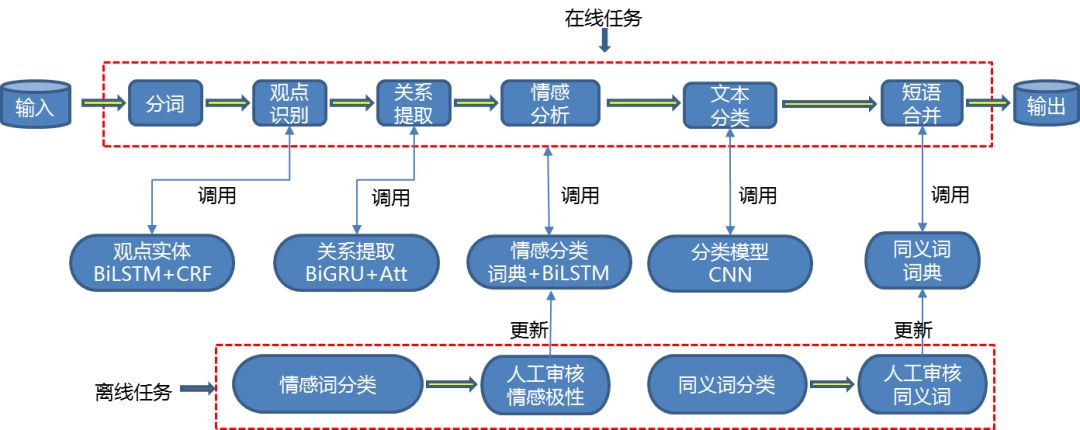

__文本预处理:__

（英文）词干提取、词性还原、大小写转换、词向量化，（中文）分词、去停用词、词性标注、词向量化



__文本向量化：__

- TF-IDF
- BOW、
- One-hot、
- 分布式表示方式（word2vec、glove）等。

__文本分类模型:__
- 贝叶斯、SVM、随机森林、KNN等
- 深度学习）textCNN、FastText、RNN、LSTM、HAN、TextRNN（Bi-directional RNN）、TextRNN + Attention、TextRCNN（TextRNN + CNN）

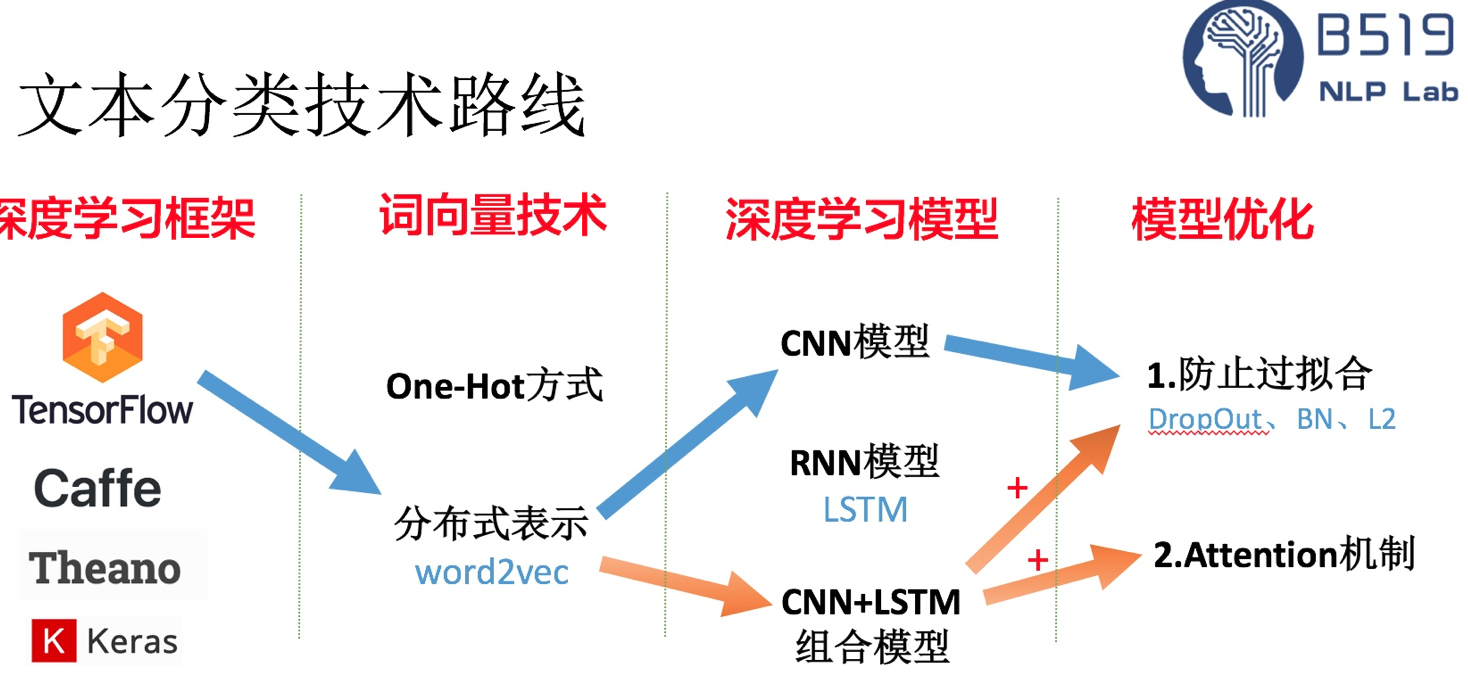

## Tokenization 分词

https://blog.csdn.net/qq_38888209/article/details/104398821

- __基于字符串匹配的分词方法:__

过程：这是一种基于词典的中文分词，核心是首先建立统一的词典表，当需要对一个句子进行分词时，首先将句子拆分成多个部分，将每一个部分与字典一一对应，如果该词语在词典中，分词成功，否则继续拆分匹配直到成功。

核心： 字典，切分规则和匹配顺序是核心。

分析：优点是速度快，时间复杂度可以保持在O（n）,实现简单，效果尚可；但对歧义和未登录词处理效果不佳。

- __基于理解的分词方法:__

因此目前基于理解的分词系统还处在试验阶段。

- __基于统计的分词方法：__

过程：统计学认为分词是一个概率最大化问题，即拆分句子，基于语料库，统计相邻的字组成的词语出现的概率，相邻的词出现的次数多，就出现的概率大，按照概率值进行分词，所以一个完整的语料库很重要。

- N元文法模型（N-gram），
- 隐马尔可夫模型（Hidden Markov Model ，HMM）
- 最大熵模型（ME）
- 条件随机场模型（Conditional Random Fields，CRF）

## word embedding

### OVEWVIEW

- https://www.tensorflow.org/text/guide/word_embeddings
- https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
- https://jalammar.github.io/illustrated-word2vec/
- https://www.infoq.cn/article/pfvzxggdm27453bbs24w

__Meaning:__

word embedding 是文本表示的一类方法。跟 one-hot 编码和整数编码的目的一
文本表示的目的是把文本预处理后的转换成计算机可理解的方式，是决定文本分类质量最重要的部分。传统做法常用词袋模型（BOW, Bag Of Words）或向量空间模型（Vector Space Model），最大的不足是忽略文本上下文关系，每个词之间彼此独立，并且无法表征语义信息。词袋模型的示例如下：

               ( 0, 0, 0, 0, .... , 1, ... 0, 0, 0, 0)

__Text to numbver:__

Machine learning models take vectors (arrays of numbers) as input. When working with text, the first thing you must do is come up with a strategy to convert strings to numbers (or to "vectorize" the text) before feeding it to the model. In this section, you will look at three strategies for doing so.










__Advantage:__

- 可以将文本通过一个低维向量来表达，不像 one-hot 那么长。
- 语意相似的词在向量空间上也会比较相近。
- 通用性很强，可以用在不同的任务中

- VISUALISE:http://projector.tensorflow.org/

- https://www.tensorflow.org/text/guide/word_embeddings
- https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

### Type of word embedding


__1.Frequency/Probablity based Embedding:(TRADIONAL ML METHOD)__
- Count Vectors
- TF-IDF
- Co-Occurrence Matrix 
- Bag of Words(BOW)


__2.Prediction based - Static:__
- Word2vec
- FastText
- GloVe


__3.Prediction based - Non-Static:__

Non static: address 一次多意的问题. Apple(company & fruit)
- ELMO
- BERT
- GPT


- [advantage and disadvantage](https://easyai.tech/blog/nlp-%E9%A2%86%E5%9F%9F%E9%87%8C%E7%9A%848-%E7%A7%8D%E6%96%87%E6%9C%AC%E8%A1%A8%E7%A4%BA%E6%96%B9%E5%BC%8F%E5%8F%8A%E4%BC%98%E7%BC%BA%E7%82%B9/)

### bag of words









__Advantage:__

- 能学习出一些关键词和类别之间的映射关系
- 从IDF 的计算方法可以看出常用词（如：“我”、“是”、“的”等）在语料库中的很多文章都会出现，故IDF的值会很小；而关键词（如：“自然语言处理”、“NLP ”等）只会在某领域的文章出现，IDF 的值会比较大；故：TF-IDF 在保留文章的重要词的同时可以过滤掉一些常见的、无关紧要的词；(TFIDF)
- 考虑了句子中词的顺序（COVARIDANCE MATRIX)

__Disadvantage:__
- 该编码忽略词的位置信息，位置信息在文本中是一个很重要信息，词的位置不一样语义会有很大的差别（如 “猫爱吃老鼠” 和 “老鼠爱吃猫” 的编码一样）；（Bag of words)
- 不能反映词的位置信息，在对关键词进行提取时，词的位置信息（如：标题、句首、句尾的词应该赋予更高的权重(TDIDF)
- IDF 是一种试图抑制噪声的加权，本身倾向于文本中频率比较小的词，这使得IDF 的精度不高；TF-IDF 严重依赖于语料库（尤其在训练同类语料库时，往往会掩盖一些同类型的关键词；如：在进行TF-IDF 训练时，语料库中的 娱乐 新闻较多，则与 娱乐 相关的关键词的权重就会偏低 ），因此需要选取质量高的语料库进行训练；
- 共现矩阵也是稀疏矩阵（可以使用 SVD、PCA 等算法进行降维，但是计算量很大）

### word2vec

- https://aistudio.baidu.com/aistudio/projectdetail/306925


Word2Vec is not a singular algorithm, rather, it is a family of model architectures and optimizations that can be used to learn word embeddings from large datasets.


__Prediction based Embedding(WORD2VEC)__

- CBOW（ predicts the middle word based on surrounding context words. ）


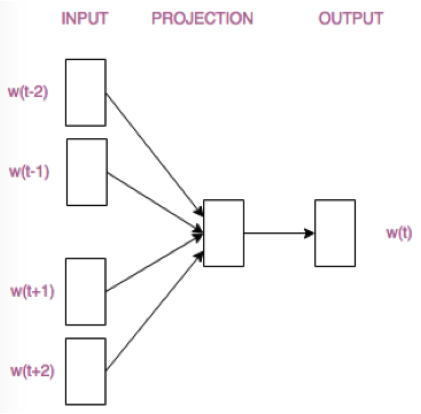!

- Skip-Gram(predict words within a certain range before and after the current word

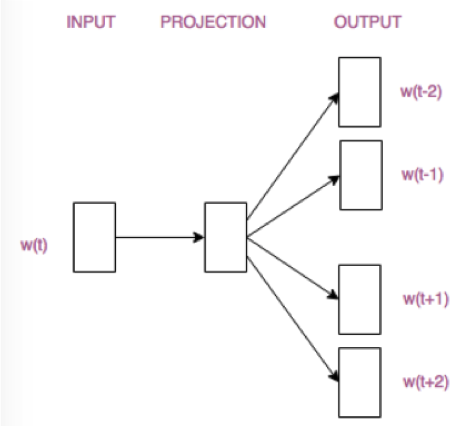

两种加速算法
- Negative Sample
- Hierarchical Softmax

__Advantage of ngram:__

- does not need to have huge RAM requirements like that of co-occurrence matrix

__Disadvantage of ngram:__

- CBOW takes the average of the context of a word


__Advantge of skipgram:__

- Skip-gram model can capture two semantics for a single word. i.e it will have two vector representations of Apple. One for the company and other for the fruit.
- Skip-gram with negative sub-sampling outperforms every other method generally.


### ELMO

## NLP Framework

目前神经网络在进行训练的时候基本都是基于后向传播（Back Propagation，BP）算法，通过对网络模型参数进行随机初始化，然后利用优化算法优化模型参数。但是在标注数据很少的情况下，通过神经网络训练出的模型往往精度有限，“预训练”则能够很好地解决这个问题，并且对一词多义进行建模。



预训练是通过大量无标注的语言文本进行语言模型的训练，得到一套模型参数，利用这套参数对模型进行初始化，再根据具体任务在现有语言模型的基础上进行精调。预训练的方法在自然语言处理的分类和标记任务中，都被证明拥有更好的效果。目前，热门的预训练方法主要有三个：

__ELMo，OpenAI GPT和BERT__

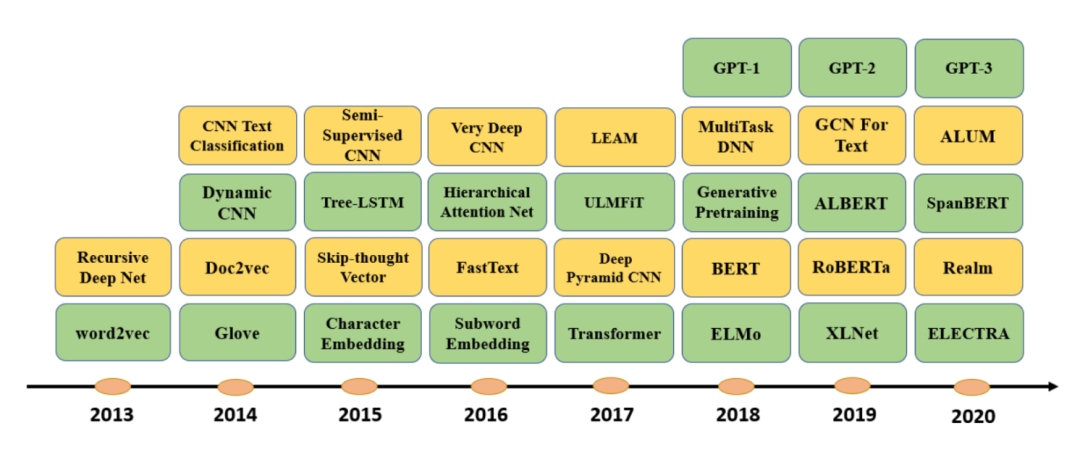

__文本分类模型:__
- 贝叶斯、SVM、随机森林、KNN等
- 深度学习）textCNN、FastText、RNN、LSTM、HAN、TextRNN（Bi-directional RNN）、TextRNN + Attention、TextRCNN（TextRNN + CNN）

- https://www.leiphone.com/category/yanxishe/TbZAzc3CJAMs815p.html
- https://zhuanlan.zhihu.com/p/50657430

3 NLP Framework.Deep Neural Networks can only map __vectors to vectors__.
- Encoder-Decoder
- Seq2Seq
- Attention

Learning mapping sequence to sequence is important in task
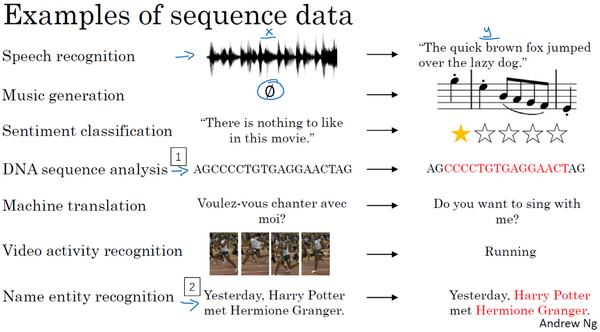

### Encoder-Decoder

Encoder-Decoder 模型主要是 NLP 领域里的概念。它并不特值某种具体的算法，而是一类算法的统称。Encoder-Decoder 算是一个通用的框架，在这个框架下可以使用不同的算法来解决不同的任务。

__说明:__
- 不论输入和输出的长度是什么，$$中间的「向量 c」 长度都是固定的$$（这也是它的缺陷，下文会详细说明）
- 根据不同的任务可以选择不同的编码器和解码器（可以是一个 RNN ，但通常是其变种 LSTM 或者 GRU ）

Encoder 又称作编码器。它的作用就是「将现实问题转化为数学问题」

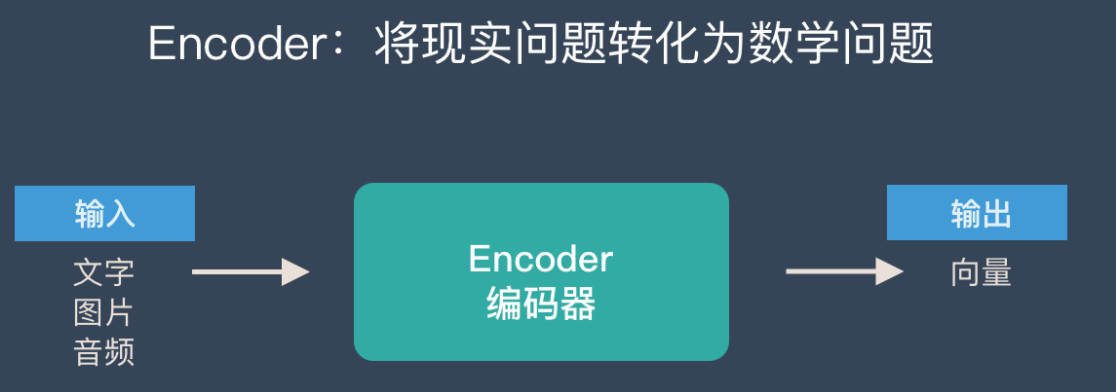

Decoder 又称作解码器，他的作用是「求解数学问题，并转化为现实世界的解决方案」
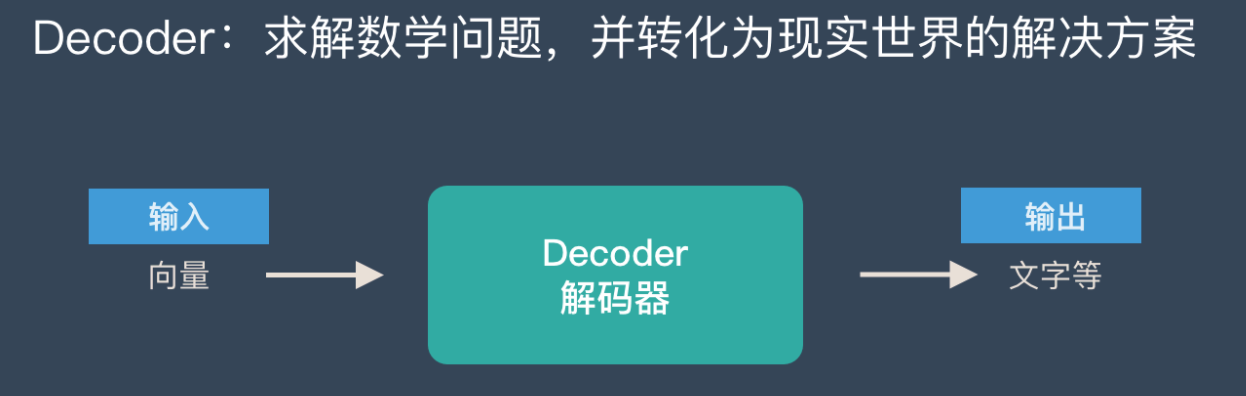

把 2 个环节连接起来，用通用的图来表达则是下面的样子：

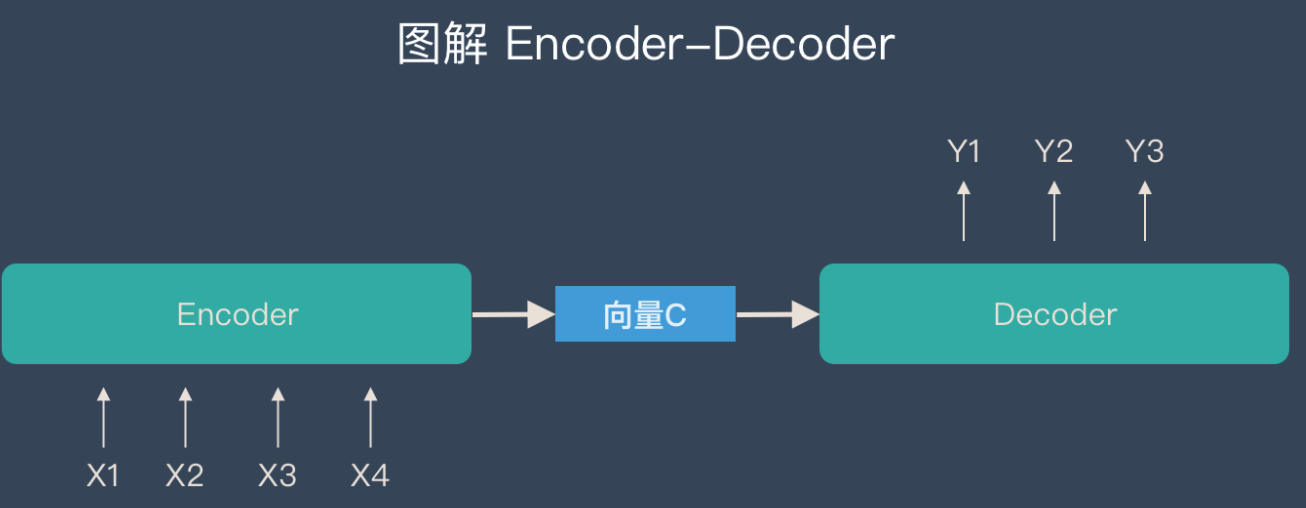

### seq2seq

Seq2Seq（是 Sequence-to-sequence 的缩写），就如字面意思，输入一个序列，输出另一个序列。这种结构最重要的地方在于输入序列和输出序列的长度是可变的。

Seq2Seq（强调目的）不特指具体方法，满足「输入序列、输出序列」的目的，都可以统称为 Seq2Seq 模型。

而 Seq2Seq 使用的具体方法基本都属于Encoder-Decoder 模型（强调方法）的范畴。



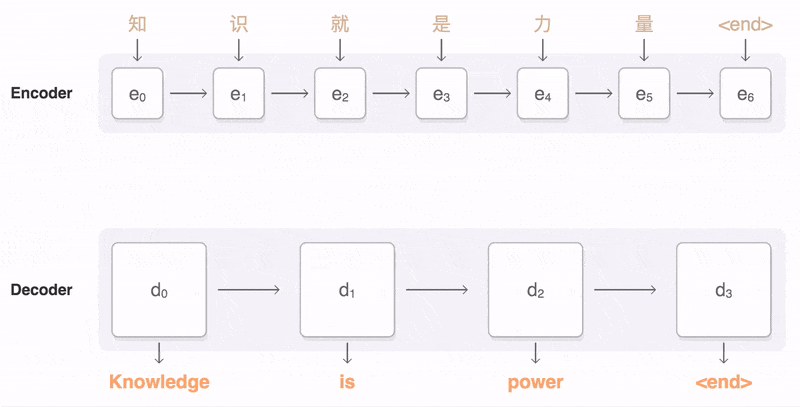

### Attention

https://easyai.tech/ai-definition/attention/



Attention 机制就是为了解决「信息过长，信息丢失」的问题(CONTEXT VECTOR)


在 Attention 机制引入之前，有一个问题大家一直很苦恼：长距离的信息会被弱化，就好像记忆能力弱的人，记不住过去的事情是一样的。

Attention 是挑重点，就算文本比较长，也能从中间抓住重点，

__但是，Attention 并不一定要在 Encoder-Decoder 框架下使用的，他是可以脱离 Encoder-Decoder 框架的。__
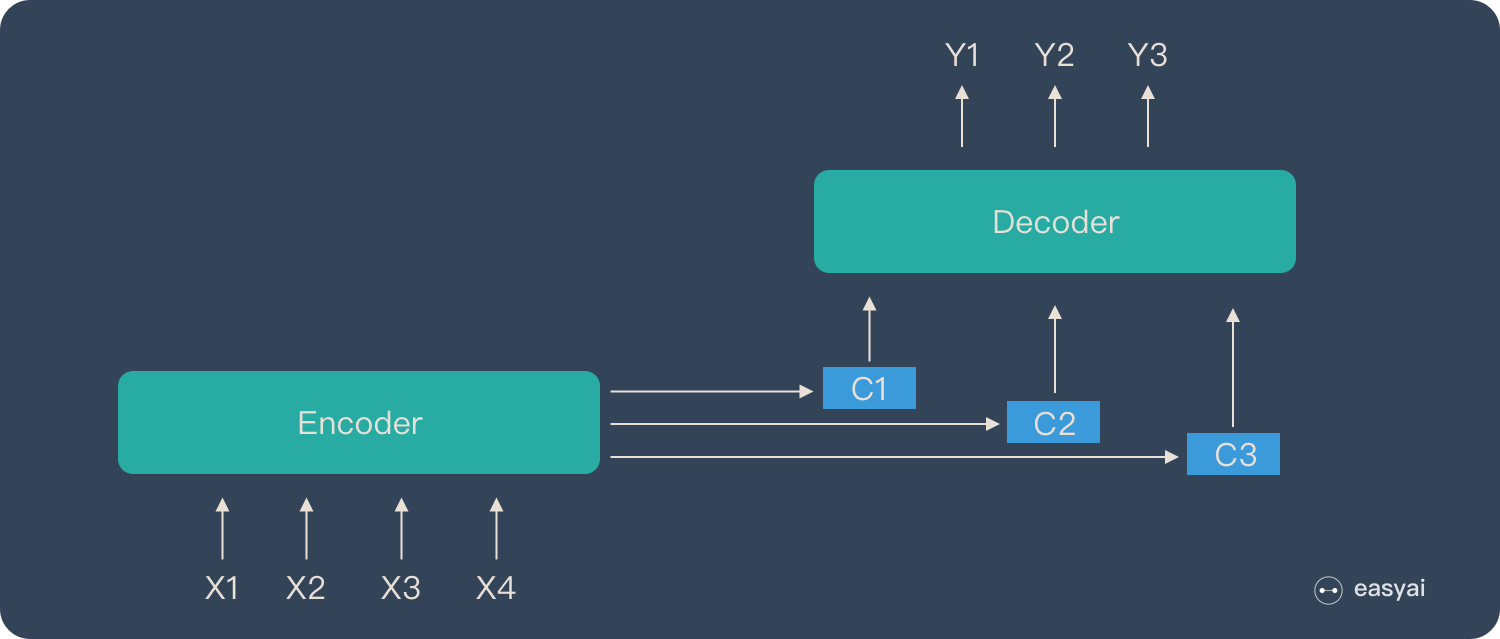


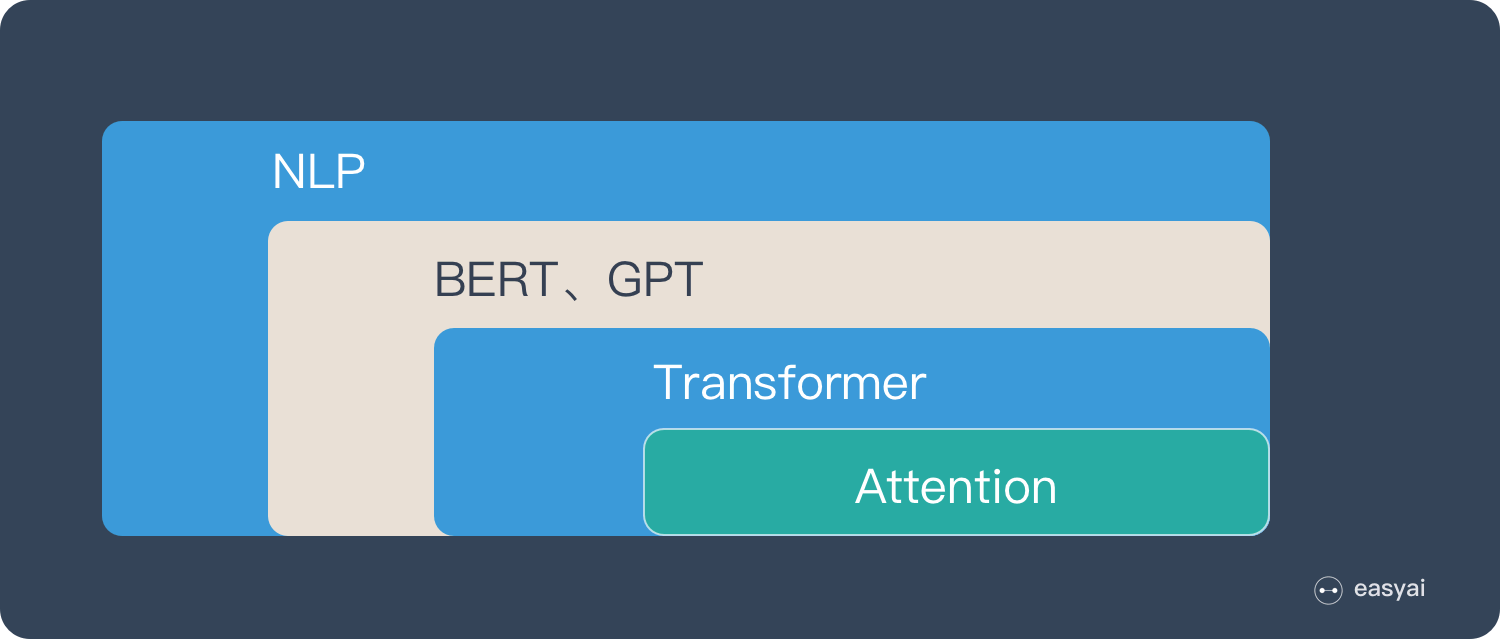

__NO ATTENTION:__
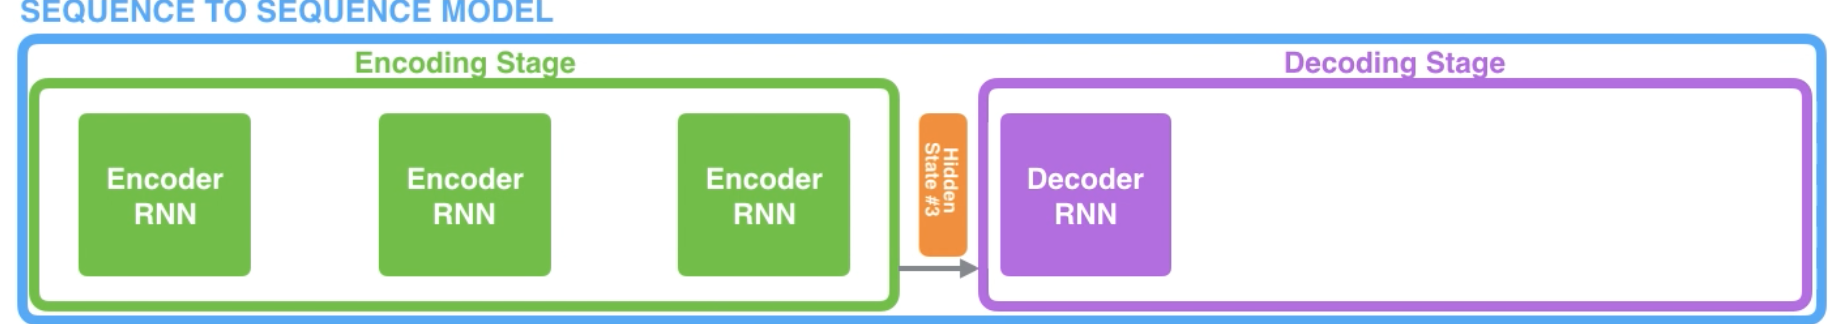


__WITH ATTENTION:__
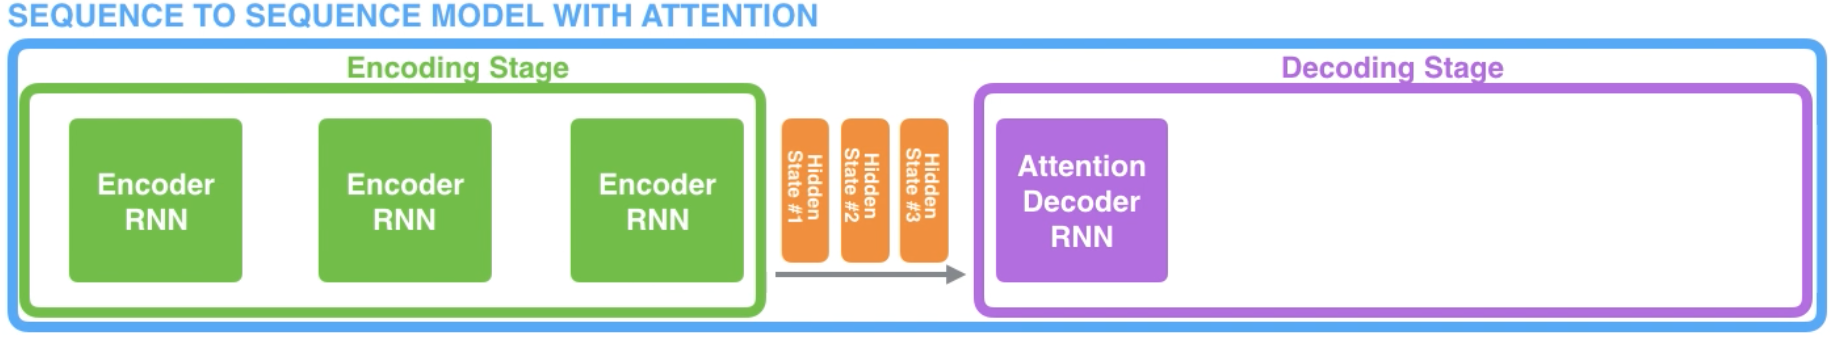


__Attention decoding__

1. The attention decoder RNN takes in the embedding of the  token, and an initial decoder hidden state.
2. The RNN processes its inputs, producing an output and a new hidden state vector (h4). The output is discarded.
3. Attention Step: We use the encoder hidden states and the h4 vector to calculate a context vector (C4) for this time step.
4. We concatenate h4 and C4 into one vector.We pass this vector through a feedforward neural network (one trained jointly with the model).
5. The output of the feedforward neural networks indicates the output word of this time step.Repeat for the next time steps
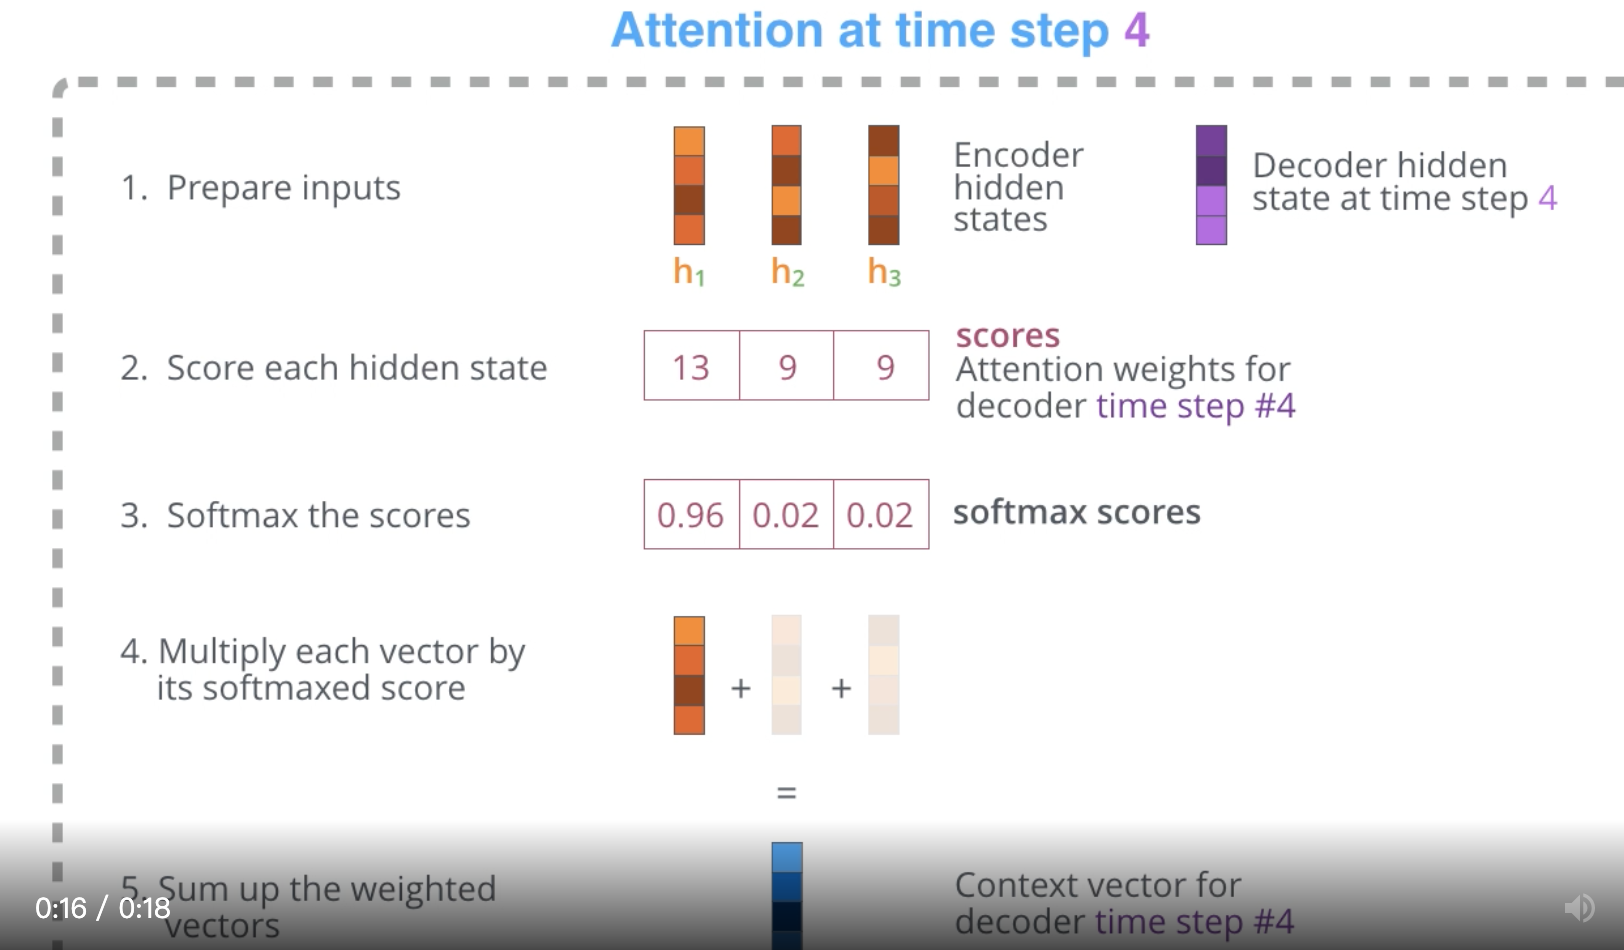


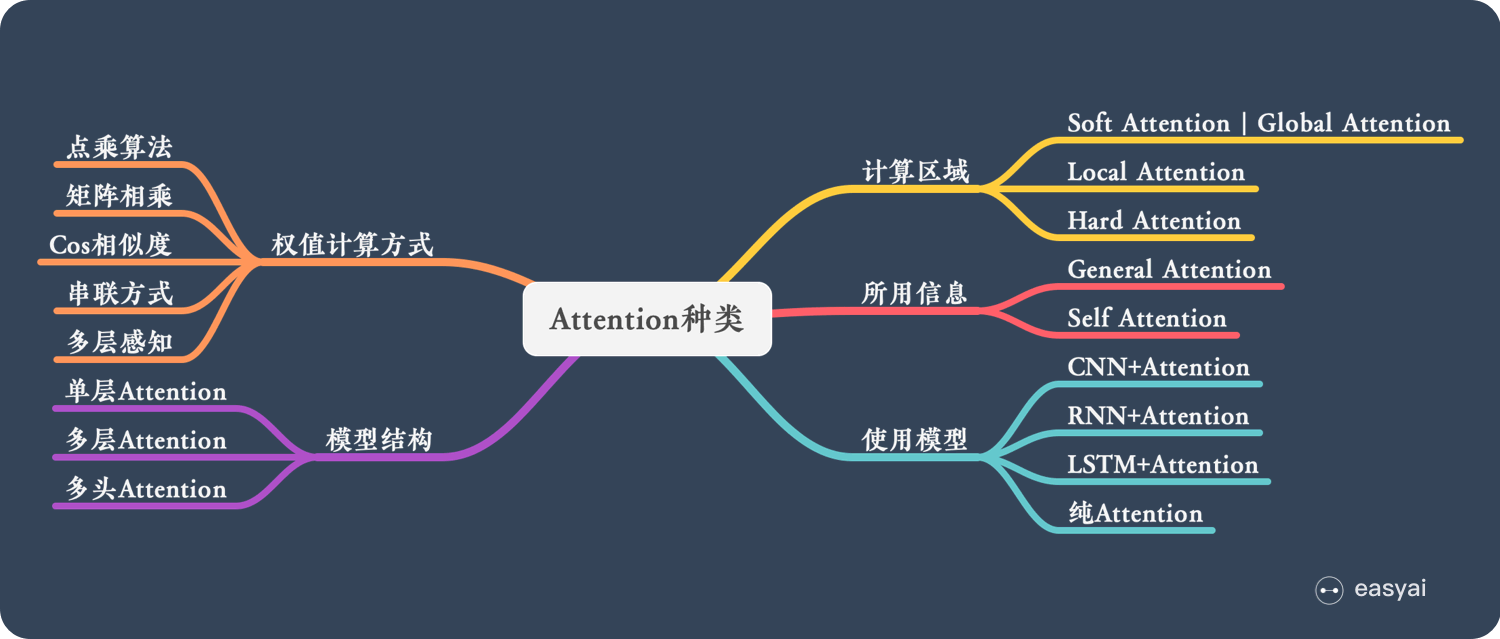

### Transformer

- https://zhuanlan.zhihu.com/p/54523019
- https://github.com/jessevig/bertviz

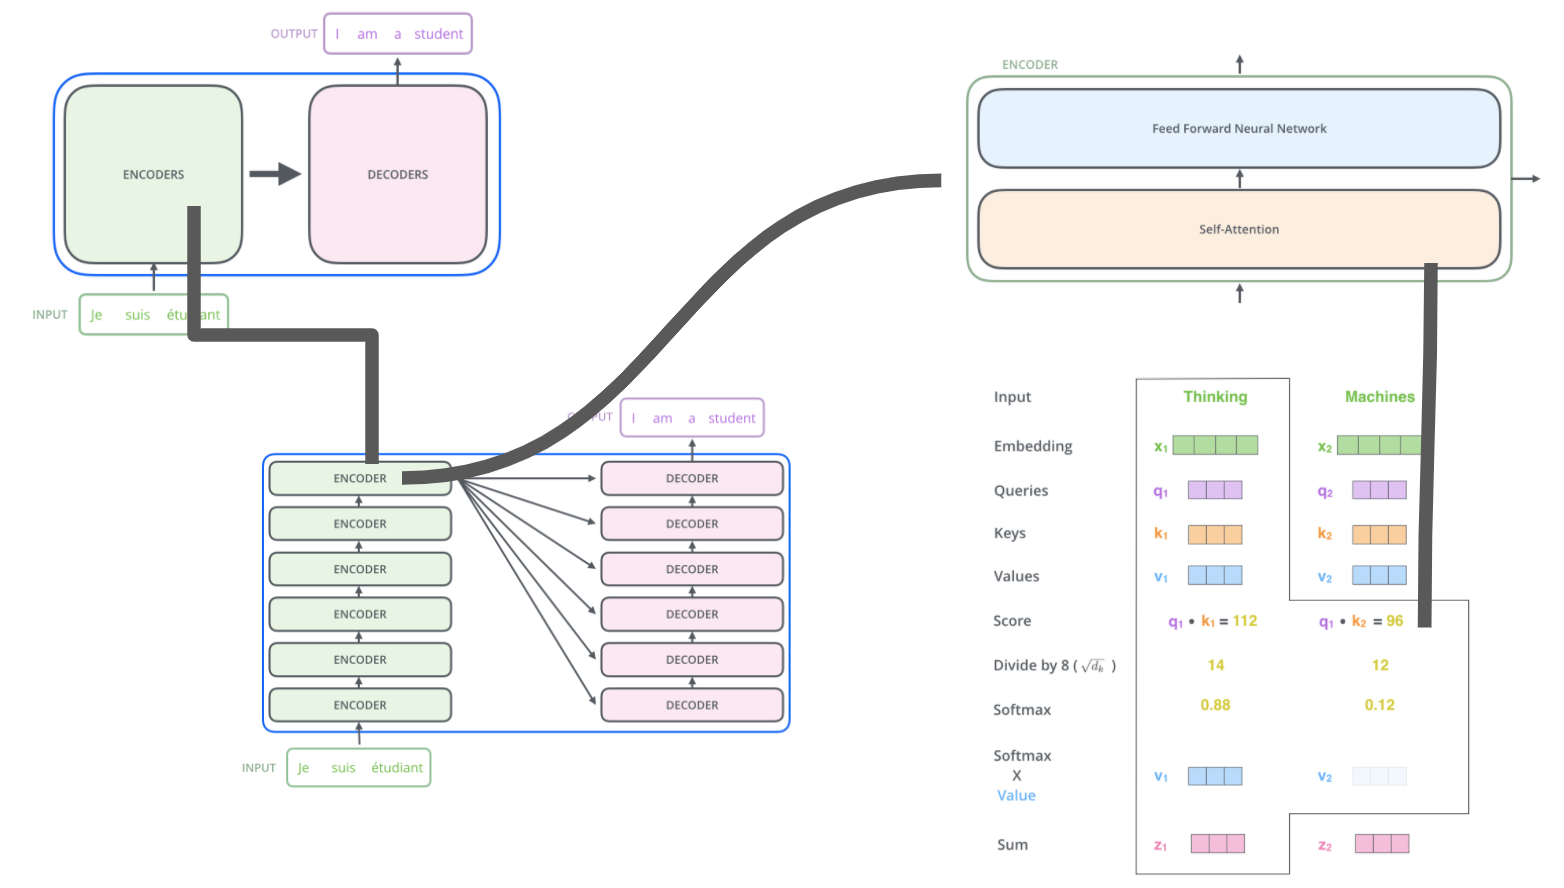

The Transformer – a model that uses attention to boost the speed with which these models can be trained. The Transformers outperforms the Google Neural Machine Translation model in specific tasks. The biggest benefit, however, comes from how The Transformer lends itself to parallelization. It is in fact Google Cloud’s recommendation to use The Transformer as a reference model to use their Cloud TPU offering. So let’s try to break the model apart and look at how it functions.

The Transformer was proposed in the paper Attention is All You Need. 

自Attention机制提出后，加入attention的Seq2seq模型在各个任务上都有了提升，所以现在的seq2seq模型指的都是结合RNN和attention的模型。之后google又提出了解决Seq2Seq问题的Transformer模型，用全attention的结构代替了lstm，在翻译任务上取得了更好的成绩。



__Highlights:__

- built based on seq2seq framework
- use self-attention
- 把序列中的所有单词或者符号并行处理


#### self attention


__Encoder:__

- each word, we create a Query vector, a Key vector, and a Value vector. These vectors are created by multiplying the embedding by three matrices that we trained during the training process.
- Their dimensionality is 64, while the embedding and encoder input/output vectors have dimensionality of 512.
 
- we’re calculating the self-attention for the first word in this example, “Thinking”. We need to score each word of the input sentence against this word. The score determines how much focus to place on other parts of the input sentence as we encode a word at a certain position.


__Dot product:__
- The score is calculated by taking the dot product of the query vector with the key vector of the respective word we’re scoring.

__Softmax:__

- This softmax score determines how much each word will be expressed at this position. Clearly the word at this position will have the highest softmax score, but sometimes it’s useful to attend to another word that is relevant to the current word.


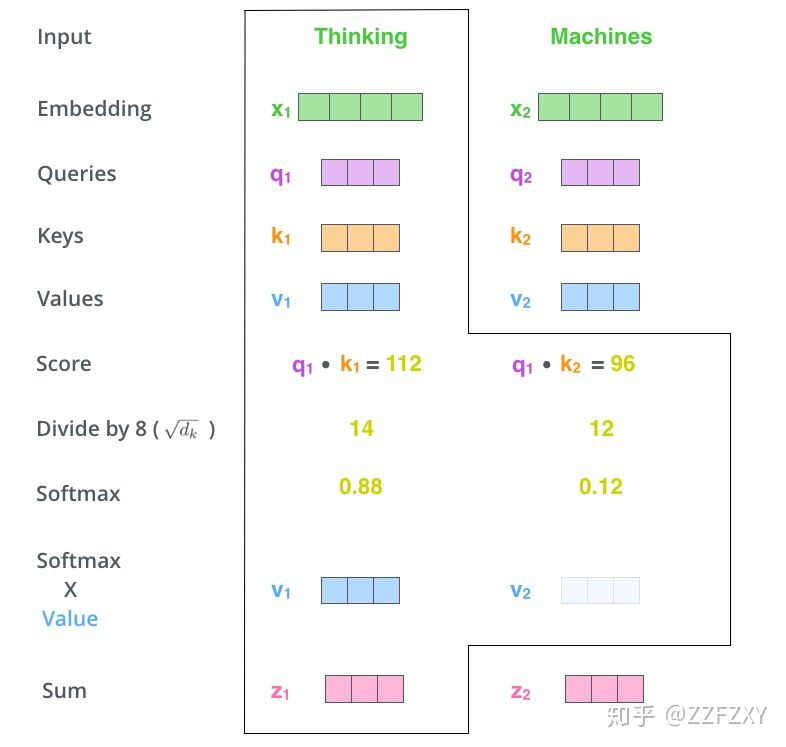

__Mutihead attention:__

- It expands the model’s ability to focus on different positions
- It gives the attention layer multiple “representation subspaces”. As we’ll see next, with multi-headed attention we have not only one, but multiple sets of Query/Key/Value weight matrices (the Transformer uses eight attention heads, so we end up with eight sets for each encoder/decoder)
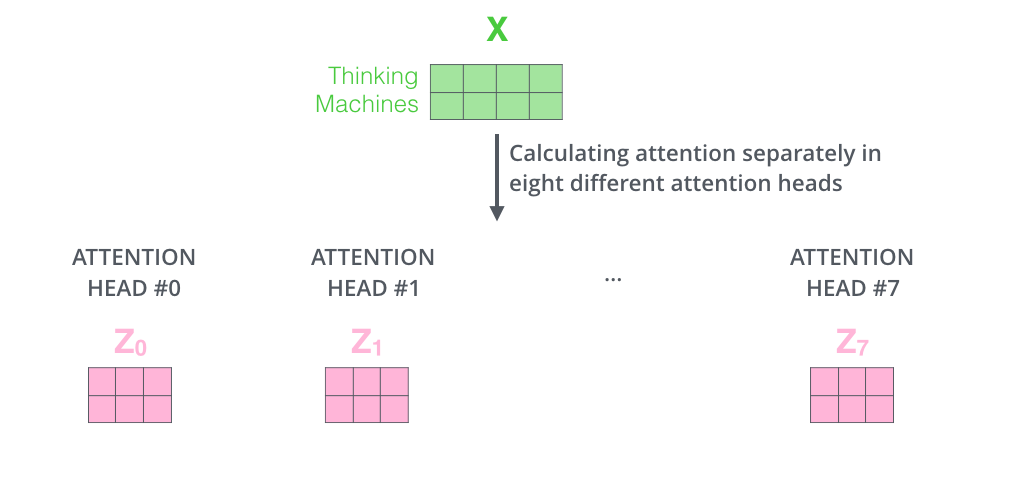

The feed-forward layer is not expecting eight matrices – it’s expecting a single matrix (a vector for each word). So we need a way to condense these eight down into a single matrix. We concat the matrices then multiple them by an additional weights matrix WO.
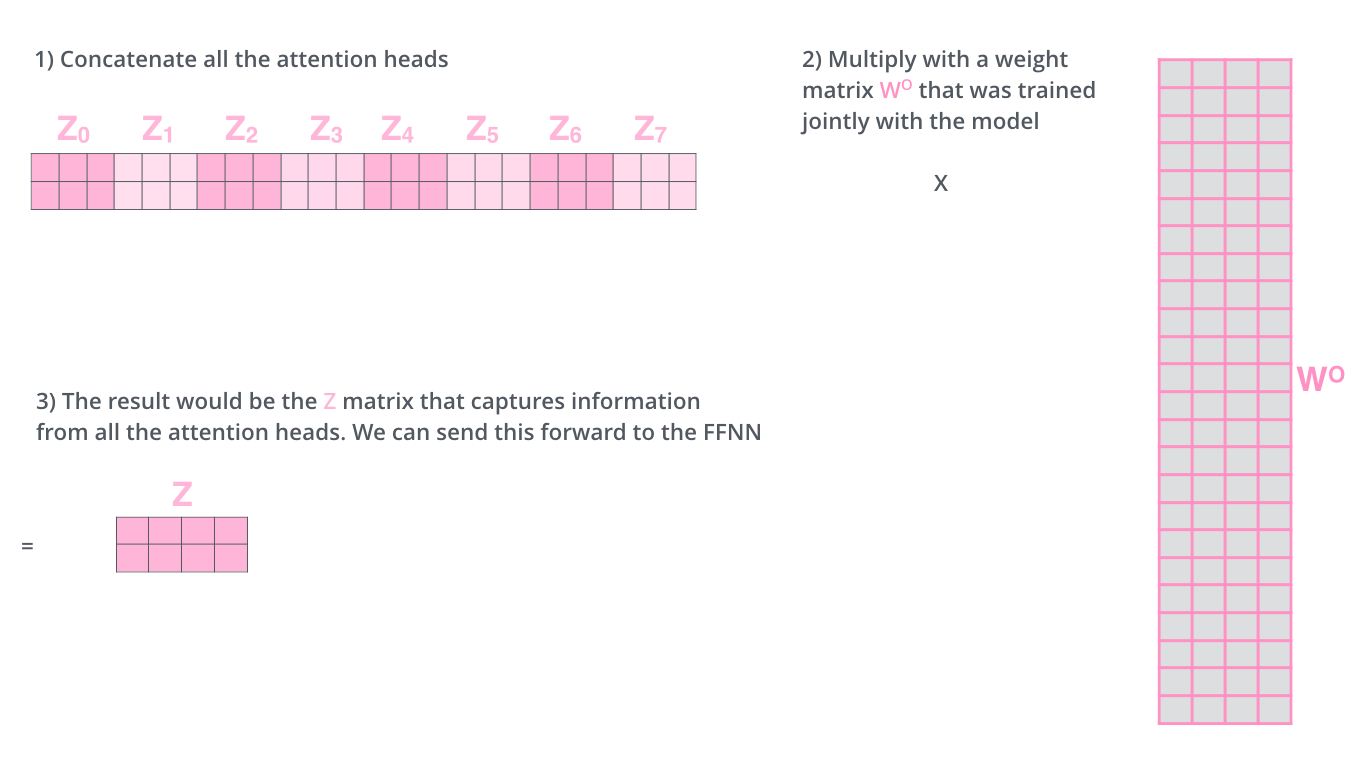

__Example:__

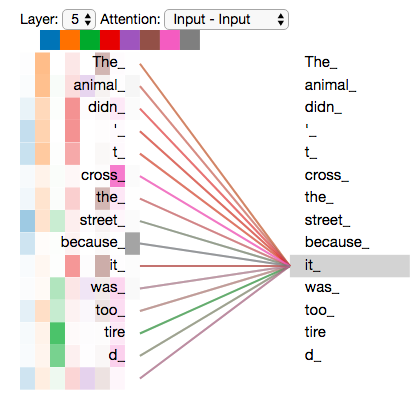


### ***BERT- PreTrained Bidiretional Encoder of Transformer***

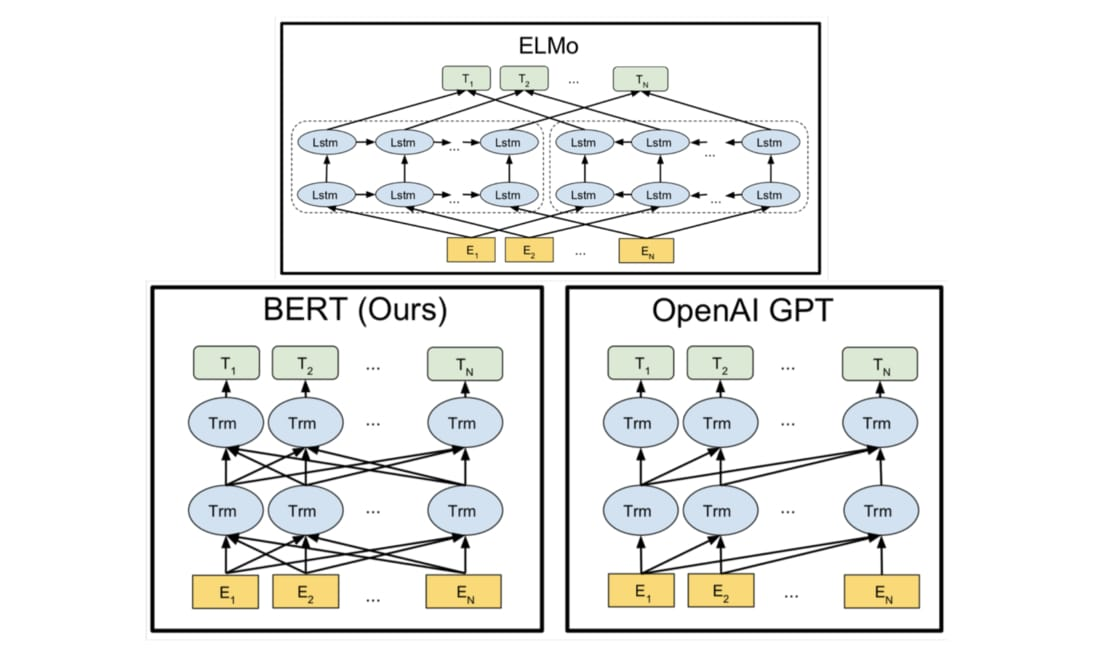

因为decoder是不能获要预测的信息的。模型的主要创新点都在pre-train方法上，即用了Masked LM和Next Sentence Prediction两种方法分别捕捉词语和句子级别的representation。

特点

- 它在训练双向语言模型时以减小的概率把少量的词替成了Mask或者另一个随机的词。我个人感觉这个目的在于使模型被迫增加对上下文的记忆。至于这个概率，我猜是Jacob拍脑袋随便设的。
- 增加了一个预测下一句的loss。

- 12层，并不宽(wide），中间层只有1024，而之前的Transformer模型中间层有2048。这似乎又印证了计算机图像处理的一个观点——深而窄 比 浅而宽 的模型更好。
- MLM（Masked Language Model），同时利用左侧和右侧的词语，这个在ELMo上已经出现了，绝对不是原创。其次，对于Mask（遮挡）在语言模型上的应用，

结构

BERT架构建立在Transformer之上。 我们目前有两个可用的变体：

- BERT Base：12层（transformer模块），12层注意力，1.1亿参数
- BERT Large：24层（transformer模块），16层注意力，3.4亿参数

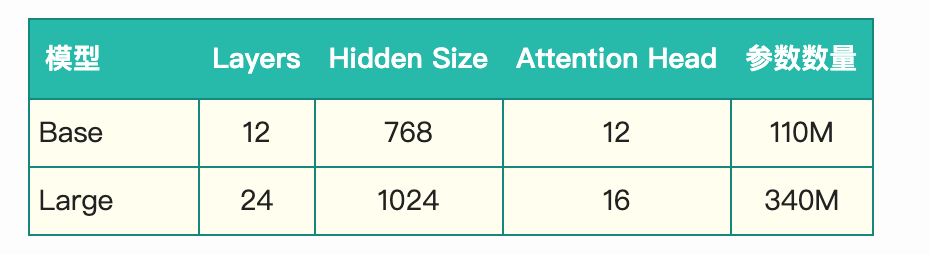


- BERT, like GPT-2, uses the transformer architecture. However, it uses the encoder part instead of the decoder part.

- The transformer decoder is a natural fit for the word embedding learning task because it works backwards only: e.g. the token at a certain position in the sentence only has access to the previous tokens. This is considered a good thing because it's been shown, in practice, that a sufficiently complex network that naively includes the context of the posterior sequence of words in determining a word suffers from target leakage (see "Leakage, especially knowledge leakage").


- ELMO has access to both prior and posterior information. However, it uses a bidirectional LSTM, which is a weaker context transfer learner (given a sufficiently long sequence) than self-attention is. This is a sort of implicit regularization built into ELMO that BERT, with its over-eager learner, doesn't have.

在训练时主要解两个任务：
Masked Language Model（MLM）
通过随机掩盖一些词（替换为统一标记符[MASK]），然后预测这些被遮盖的词来训练双向语言模型，并且使每个词的表征参考上下文信息。

这样做会产生两个缺点：（1）会造成预训练和微调时的不一致，因为在微调时[MASK]总是不可见的；（2）由于每个Batch中只有15%的词会被预测，因此模型的收敛速度比起单向的语言模型会慢，训练花费的时间会更长。对于第一个缺点的解决办法是，把80%需要被替换成[MASK]的词进行替换，10%的随机替换为其他词，10%保留原词。由于Transformer Encoder并不知道哪个词需要被预测，哪个词是被随机替换的，这样就强迫每个词的表达需要参照上下文信息。对于第二个缺点目前没有有效的解决办法，但是从提升收益的角度来看，付出的代价是值得的。

Next Sentence Prediction（NSP）
为了训练一个理解句子间关系的模型，引入一个下一句预测任务。这一任务的训练语料可以从语料库中抽取句子对包括两个句子A和B来进行生成，其中50%的概率B是A的下一个句子，50%的概率B是语料中的一个随机句子。NSP任务预测B是否是A的下一句。NSP的目的是获取句子间的信息，这点是语言模型无法直接捕捉的。

Google的论文结果表明，这个简单的任务对问答和自然语言推理任务十分有益，但是后续一些新的研究[15]发现，去掉NSP任务之后模型效果没有下降甚至还有提升。我们在预训练过程中也发现NSP任务的准确率经过1-2个Epoch训练后就能达到98%-99%，去掉NSP任务之后对模型效果并不会有太大的影响。

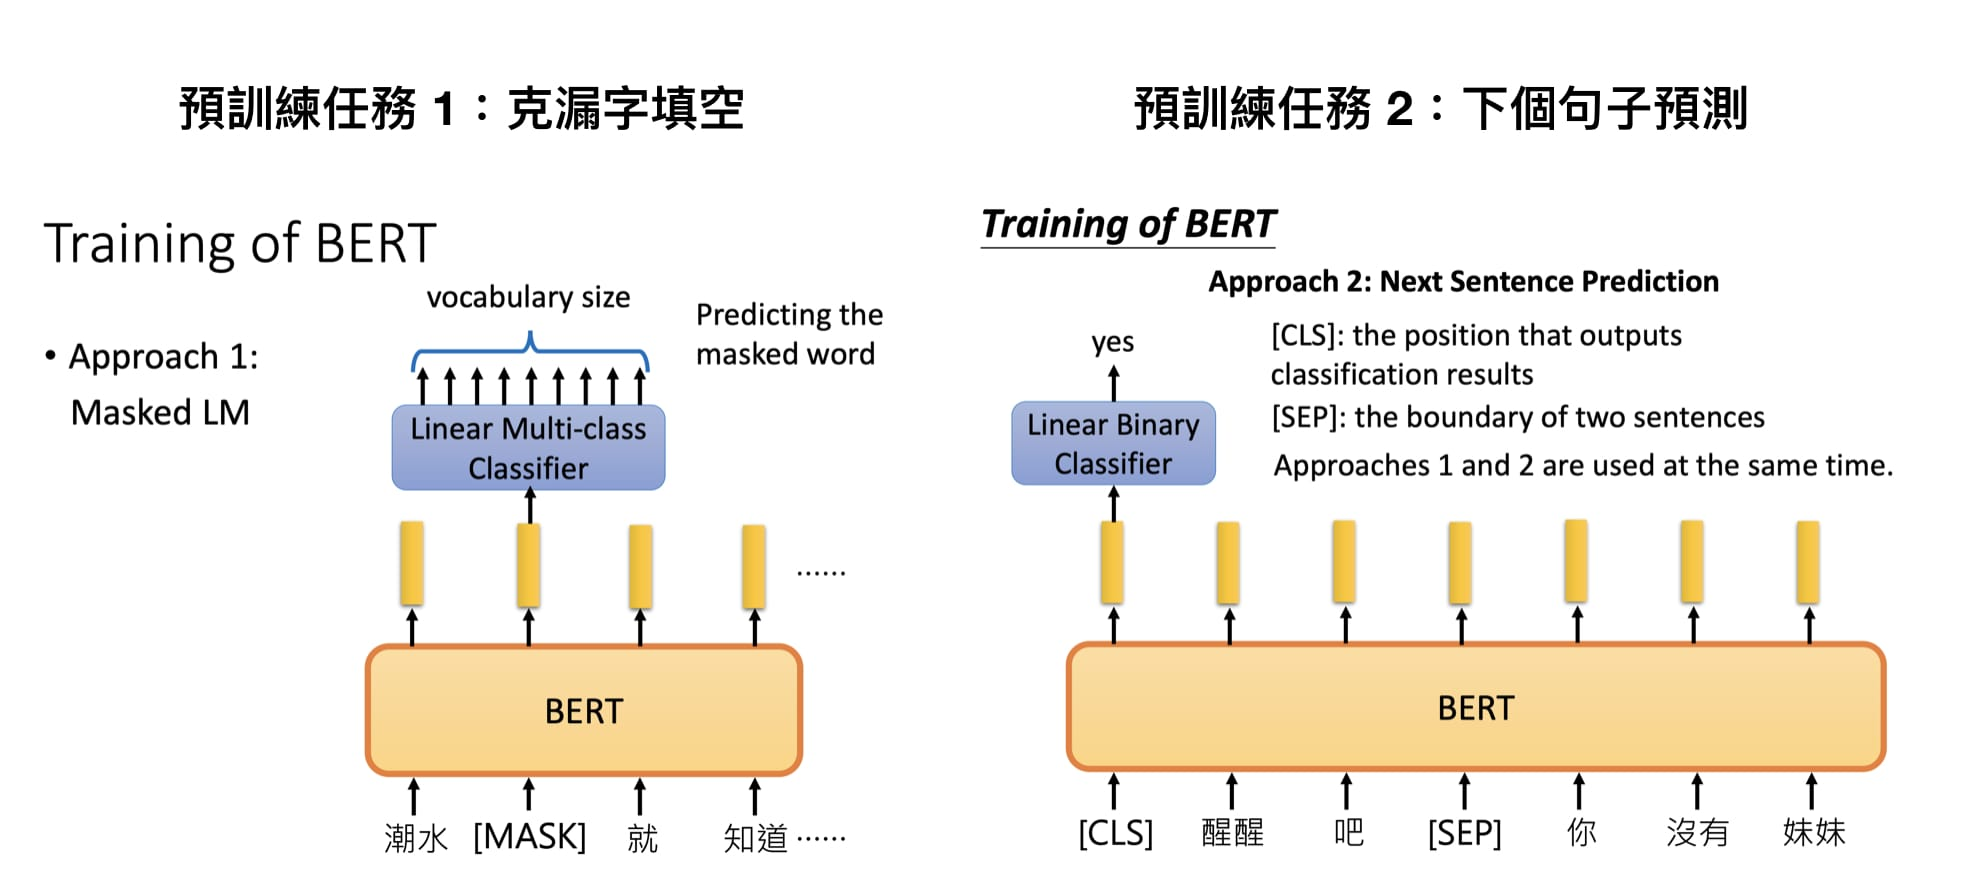

输入表示:BERT模型的输入可以是单句或者句对。对于每一个输入的Token，它的表征由其对应的词表征（Token Embedding）、段表征（Segment Embedding）和位置表征（Position Embedding）
对于英文模型，使用了Wordpiece模型来产生Subword从而减小词表规模；对于中文模型，直接训练基于字的模型。
模型输入需要附加一个起始Token，记为[CLS]，对应最终的Hidden State（即Transformer的输出）可以用来表征整个句子，用于下游的分类任务。
模型能够处理句间关系。为区别两个句子，用一个特殊标记符[SEP]进行分隔，另外针对不同的句子，将学习到的Segment Embeddings 加到每个Token的Embedding上。
对于单句输入，只有一种Segment Embedding；对于句对输入，会有两种Segment Embedding。
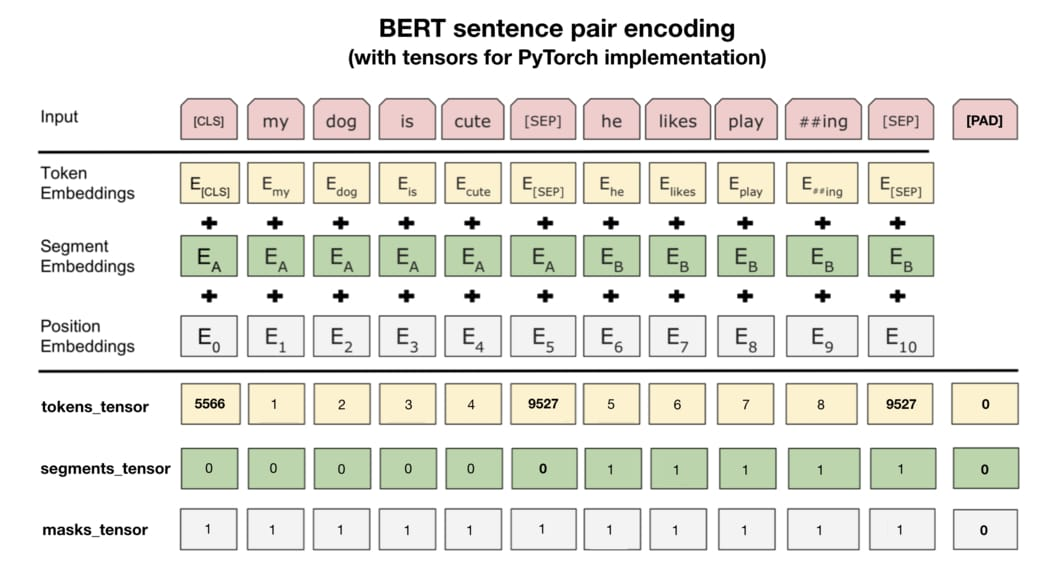

__Tasks:__
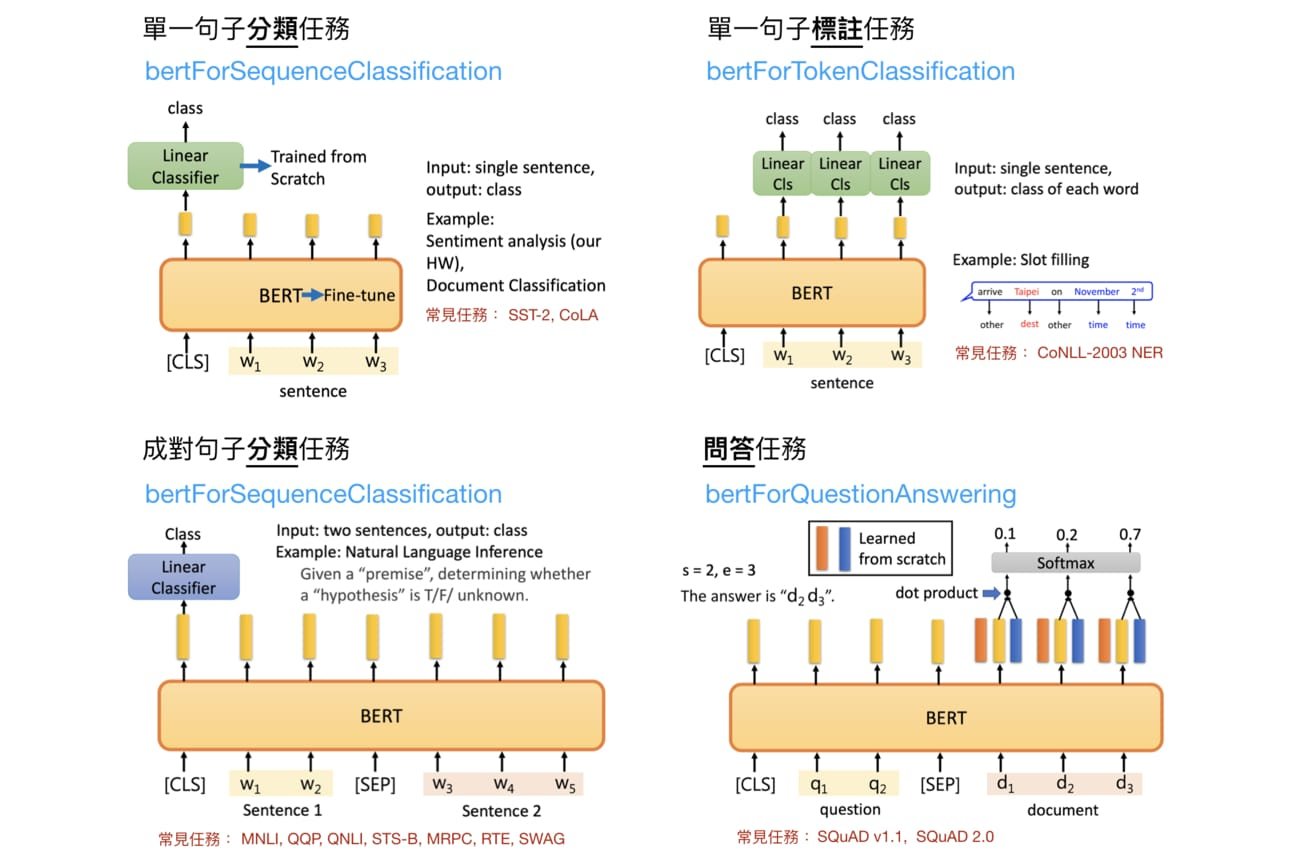


### HAN-  Hierarchical Attention Networks


CNN和RNN用在文本分类任务中尽管效果显著，但都有一个不足的地方就是不够直观，可解释性不好，特别是在分析badcase时候感受尤其深刻。而注意力（Attention）机制是自然语言处理领域一个常用的建模长时间记忆机制，能够很直观的给出每个词对结果的贡献，基本成了Seq2Seq模型的标配了。实际上文本分类从某种意义上也可以理解为一种特殊的Seq2Seq，所以考虑把Attention机制引入近来，研究了下学术界果然有类似做法。



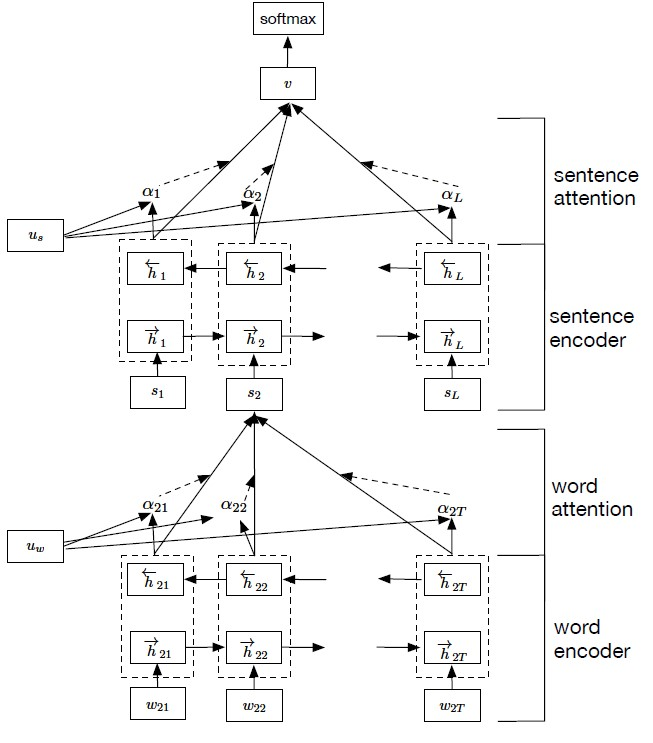

In [ ]:
S

### 多分类

__多标签分类(Multi-labelClassification):__

- 表示在类别数大于等于2的候选集合中非互斥地选取任意个类别作为输出，
- 例如一篇标题为“国务院决定设立河北雄安新区”的新闻文章可以同时被分为政治、经济两个类别
- 一类将多标签分类问题转化为多个单标签二分类问题，被成为问题转化模型(Problem Transformation)；另一类则将原来的单标签分类算法修改为支持多标签分类的算法，被称为适应性方法(Adapted Method)。问题转化模型中最常用的一种叫做Binary Relevance，其思想类似于多类分类中的One-Vs-Rest，即对每一个候选类别均训练一个二元分类器来判别样本是否属于该类。因此在类别数目很大的情况下，应尽量选择训练和预测速度较快的算法来训练内部的二元分类器

__多类分类(Multi-classClassification):__
- 类别数大于2的候选集合中互斥地选取一个类别作为输出，
- 例如将一条评论按情感倾向分类到{“正面”、“中立”、“负面”}当中的一个
- 决策树的算法和k最近邻的算法都能够较容易地修改为支持多标签分类的环境

### Model Evaluation

关于评价指标，一般最先想到的就是分类准确率(Precision)，但准确率并不是全部。如果一个分类模型的准确率很高而召回率很低(Recall)，那么反而意味着模型没能把其他本该预测出来的类别给预测出来。这常常在两种情况下发生：

一是在非均衡样本中，模型由于学习不到足够的小类的特征而倾向于把大部分小类样本预测为大类类别，虽然预测为小类的部分准确率较高，但是更多的小类样本却没有被召回。面对这种情况，应该关注小类类别的F1值情况，即准确率与召回率调和平均值；

二是在多标签分类中，如果一个模型偏向于保守，那么其可能只对某个多标签的样本预测出最有把握的一个标签，虽然保证了预测准确性，但是仍然没有召回其它的有效标签。此时，可以适当降低内部的二元分类器的预测阈值。如假设原来只有预测得分高于0.5的候选标签被输出，则将阈值降低到0.3时可以得到更多的预测标签，从而提高分类的召回率。

# Pre-processing:Text

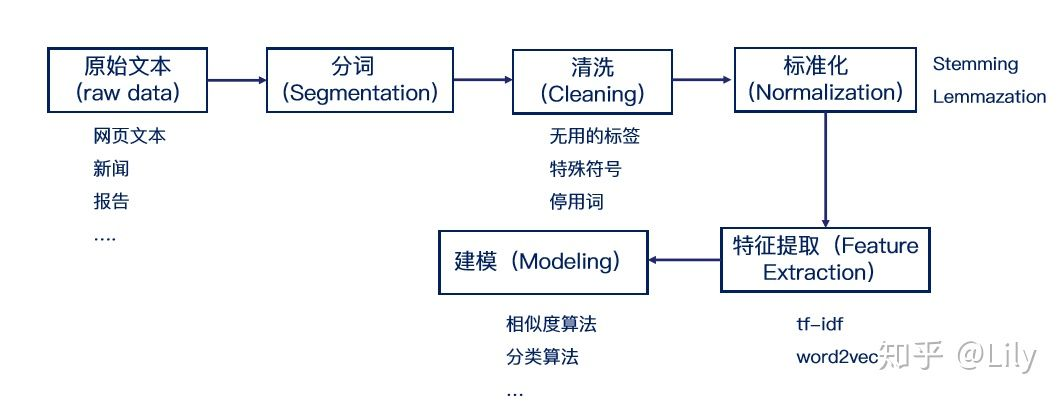


中英文的文本预处理大体流程如上图，但是还是有部分区别。首先，中文文本是没有像英文的单词空格那样隔开的，因此不能直接像英文一样可以直接用最简单的空格和标点符号完成分词。所以一般我们需要用分词算法来完成分词，具体操作后面会讲到。

当然，英文文本的预处理也有自己特殊的地方——拼写问题，很多时候，对英文预处理要包括拼写检查，比如“Helo World”这样的错误，我们不能在分析的时候再去纠错。还有就是词干提取(stemming)和词形还原(lemmatization)，主要是因为英文中一个词会会不同的形式，这个步骤有点像孙悟空的火眼金睛，直接得到单词的原始形态。比如，"faster"、"fastest", 都变为"fast"；“leafs”、“leaves”,都变为"leaf"。

## 文本清洗

### 去除停用词

停用词指的是诸如代词、介词、连接词等不包含或包含极少语义的词，另外标点符号也可以被认为是一种停用词。通常情况下，在文本中去掉这些停用词能够使模型更好地去拟合实际的语义特征，从而增加模型的泛化能力。

但值得注意的是，停用词表并不是一成不变的。针对不同的文本分类情景，所采用的停用词表也应该作出针对性的调整。例如书名号“《”和“》”往往比书名本身更能代表书名的特征、冒号“：”通常出现在人物访谈类文章的标题中，以及人称代词“他”和“她”在情感类文章标题中的频繁使用等。根据情景灵活地使用停用词表，往往能够起到意想不到的效果。


停用词就是句子没什么必要的单词，去掉他们以后对理解整个句子的语义没有影响。文本中，会存在大量的虚词、代词或者没有特定含义的动词、名词，这些词语对文本分析起不到任何的帮助，我们往往希望能去掉这些“停用词”。

在英文中，例如，"a"，"the",“to"，“their”等冠词，借此，代词..... 

__停用词指的是诸如代词、介词、连接词等不包含或包含极少语义的词，另外标点符号也可以被认为是一种停用词。通常情况下，在文本中去掉这些停用词能够使模型更好地去拟合实际的语义特征，从而增加模型的泛化能力。__




In [4]:
with open(r'data/stopword.txt',encoding='utf8') as f:
    line_list=f.readlines()
    stopword_list=[k.strip() for k in line_list]
    stopword_set=set(stopword_list)
    print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
    print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))

停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有749个元素


[['送', '朋友', '礼物', ' ', '请', '确保', '产品包装', '干净', '完整', ' ', '无', '破损', '谢谢'],
 ['请', '检查', '是否', '破损', '开', '线', ' ', '谢谢'],
 ['質量',
  '檢查',
  '一下',
  '請開',
  '發票',
  '弘威',
  '工程技术',
  '苏州',
  '有限公司',
  '91320505596941652D'],

### 去除非文本

__1.非文本数据:__
- 由于爬下来的内容中有很多html的一些标签，需要去掉。还有少量的非文本内容的可以直接用Python 的正则表达式(re)删除, 另外还有一些特殊的非英文字符和标点符号,也可以用Python的正则表达式(re)删除。

__2.长串数字或字母:__
- 很多时候我们的分类文本都来自爬虫的爬取结果，因此文本中常常会附带有HTML标签、URL地址等非文本内容，所以需要清除这部分内容对分类没有什么帮助的内容。

__3.无意义文本:__
- 此外，还需要过滤掉剩余文本当中的诸如广告内容、版权信息和个性签名的部分，毫无疑问这些也都不应该作为特征被模型所学习。

In [ ]:
# import re

# # 过滤不了\\ \ 中文（）还有————
# r1 = u'[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'#用户也可以在此进行自定义过滤字符 
# # 者中规则也过滤不完全
# r2 = "[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+"
# # \\\可以过滤掉反向单杠和双杠，/可以过滤掉正向单杠和双杠，第一个中括号里放的是英文符号，第二个中括号里放的是中文符号，第二个中括号前不能少|，否则过滤不完全
# r3 =  "[.!//_,$&%^*()<>+\"'?@#-|:~{}]+|[——！\\\\，。=？、：“”‘’《》【】￥……（）]+" 
# # 去掉括号和括号内的所有内容
# r4 =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"

# sentence = "hello! wo?rd!."
# cleanr = re.compile('<.*?>')
# sentence = re.sub(cleanr, ' ', sentence)        #去除html标签
# sentence = re.sub(r4,'',sentence)
# print(sentence)

In [9]:
# from nltk.corpus import stopwords 
# stop = set(stopwords.words('english')) 
# print(stop)

### 变形词识别和替换

变形词问题除了能让我们感叹中文博大精深之外，也时时刻刻困扰文本分类工作者，极大地增加了广告识别、涉黄涉政等特殊的文本分类场景下的分类难度。对中文词的变形通常采用的方法有：特殊符号替换、同音近型替换、简繁替换等。

要做到变形词的识别和替换，除了建立常见变形词的映射表以外，还可以尝试用拼音首字母的方法来鉴别同音替换的变形词；以及用 Word2vec词向量来对比变形词与上下文的语意关联度，从而识别出该词是否经过了变形。

## 特征提取

在用上述方法对文本提取了特征之后，如果我们直接将所有特征直接丢入分类器，那么最终训练得到的模型的效果往往并不尽如人意。特别是在模型的训练和预测速度上，由于经过多个特征提取和组合方法之后的特征空间会极度膨胀，模型需要学习的参数数量也因此暴涨，从而大大地增加了训练和预测过程的耗时。因此，在候选特征集合中选择保留最有效的部分就显得尤为重要。

- TF-IDF
- CHI-SQUARE
- 文档频率
- 互信息
- word2vec
- seq2seq

__CHI-SQUARE:__

卡方检验的目的是计算每个特征对分类结果的相关性，
- 相关性越大则越有助于分类器进行分类，否则就可以将其作为无用特征抛弃。
- 但是其缺点在于仅考虑特征是否出现对于分类结果的影响，而忽略了词频的重要性，因此卡方检验往往夸大了低频词的作用。

__TF-IDF:__
- 信息增益用来计算一个特征对整个分类系统带来的信息的多少，带来的信息越多意味着该特征对分类越重要。此外一些分类算法本身也有特征选择的作用，例如C4.5决策树就是采用信息增益的方法来计算最佳的划分特征、逻辑回归模型训练后可以得到特征权重等。
- 没有考虑特征在类间的分布情况。也就是说，假如类别A中的所有文章都包含词t，类别B中均不包含，但可能由于类别A样本在总样本中占比较极高，原本显著的分类特征t却因为计算得到的TF-IDF值较小而被过滤掉了，这显然没有起到特征选择的目的。

- CNN善于捕捉文本中关键的局部信息，
- 而RNN则善于捕捉文本的上下文信息（考虑语序信息）

In [23]:
startTime = time.time()
model = Word2Vec(wordseg, min_count=20)
usedTime = time.time() - startTime
print('形成word2vec模型共花费%.2f秒' %usedTime)

形成word2vec模型共花费0.03秒


In [19]:
# word2vec_model.most_similar(positive=['快递', '中通'], negative=['韵达'], topn=1)

In [24]:
with open(r'variables/word2vec_model.pickle','wb') as f:
    pickle.dump(model,f)
with open(r'variables/word2vec_model.pickle','rb') as f:
    word2vec_model=pickle.load(f)

In [20]:
def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords if k in word2vec_model]
    contentVector = np.array(vector_list).mean(axis=0)
    return contentVector

In [21]:
cutWords=wordseg[0]
cutWords

['送', '朋友', '礼物', ' ', '请', '确保', '产品包装', '干净', '完整', ' ', '无', '破损', '谢谢']

In [26]:
# vector_list = [model.wv[k] for k in cutWords if k in model]
# vector_list

# Test code

In [7]:
startTime = time.time()
word2vec_model = Word2Vec(wordseg, vector_size=200, window=10, min_count=1)
usedTime = time.time() - startTime
print('形成word2vec模型共花费%.2f秒' %usedTime)


# In[60]:
import numpy as np

def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords if k in word2vec_model]
    contentVector = np.array(vector_list).mean(axis=0)
    return contentVector

形成word2vec模型共花费0.45秒


In [8]:
word2vec_model.wv.most_similar('中通')

[(' ', 0.9574305415153503),
 ('发货', 0.954300045967102),
 ('请', 0.9540973901748657),
 ('麻烦', 0.9527083039283752),
 ('无', 0.9520664215087891),
 ('谢谢', 0.9517159461975098),
 ('号', 0.9513711333274841),
 ('不要', 0.9486956596374512),
 ('检查', 0.9483650326728821),
 ('不', 0.948322594165802)]

In [10]:
word2vec_model.wv.most_similar(positive=['快递', '中通'], negative=['韵达'], topn=1)


[(' ', 0.8976821899414062)]

In [14]:
word2vec_model.wv.similarity('瑕疵','质量')


0.9827718

In [49]:
def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords]
    contentVector = np.array(vector_list).mean(axis=0)
    return contentVector
# cutWords=wordseg[0]

# vector_list = [word2vec_model.wv[k] for k in cutWords] #np array3
# vector_list

In [50]:
contentVector_list = []
for i in range(len(wordseg)):
    cutWords = wordseg[i]
    ctvector=get_contentVector(cutWords, word2vec_model)
    contentVector_list.append(ctvector)
X = np.array(contentVector_list)

In [52]:
X.shape

(1353, 200)

In [53]:
remarks.shape

(1353, 4)

In [55]:
y.shape

(1353,)

In [18]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(remarks['cat'])

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
logisticRegression_model = LogisticRegression()
logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(train_X, train_y)
logisticRegression_model.score(test_X, test_y)

0.7011070110701108

In [58]:
from sklearn.model_selection import cross_val_score

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)
lg_scores=cross_val_score(logisticRegression_model,train_X,train_y,cv=5)
print(lg_scores.mean(),lg_scores.std())

0.6597989610740067 0.015011913543662306


In [60]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,MaxPooling1D

model=Sequential()
#32，input_shape=(None,200)
#model.add(MaxPooling1D())
#model.add(Flatten(input_shape=))
#model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))  

In [64]:
# model.compile(optimizer='rmsprop',loss='binary_crossentropy',metric=['acc'])


TypeError: Invalid keyword argument(s) in `compile`: {'metric'}

In [ ]:
# model.compile()

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import AdaBoostClassifier
import warnings
from sklearn.model_selection import ShuffleSplit

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings("ignore")

In [84]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

#gnb_clf=GaussianNB()
ada_clf=AdaBoostClassifier()
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='soft')

In [87]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    scores=cross_val_predict(clf,train_X,train_y,cv=5)
    print(scores)

[0 1 0 ... 0 1 1]
[0 0 1 ... 0 0 1]
[0 1 0 ... 0 0 1]
[0 1 0 ... 0 0 1]


In [88]:
clf.__class__.__name__

'VotingClassifier'

In [93]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300], 'max_features': ['sqrt','log2'],'criterion':['gini','entropy'],
              'min_samples_split':[3,5,7]}
grid_search = GridSearchCV(rnd_clf, param_grid=param_grid, cv=5,refit=True,scoring='precision_micro')
start=time.time()
grid_search.fit(train_X,train_y)
end=time.time()
print('time used is ',end-start/3600)

time used is  1626990267.8860037


In [94]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

# In[]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.837 (std: 0.010)
Parameters: {'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.836 (std: 0.023)
Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 7, 'n_estimators': 200}

Model with rank: 3
Mean validation score: 0.835 (std: 0.021)
Parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}



In [96]:
from sklearn.metrics import accuracy_score
y_pred_grid=grid_search.predict(test_X)
print('test acc is ', accuracy_score(test_y,y_pred_grid))


# In[]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('test precision is ', precision_score(test_y,y_pred_grid))
print('test recall is ', recall_score(test_y,y_pred_grid))

# In[]:
voting_clf.fit(train_X,train_y)
outcomeV=voting_clf.predict(test_X)
outcomeGrid=grid_search.predict(test_X)
rlt_df=pd.concat([rlt_df,pd.Series(outcomeV)],axis=1)
rlt_df.rename(columns={0:'v_pred'},inplace=True)
rlt_df=pd.concat([rlt_df,pd.Series(outcomeGrid)],axis=1)
rlt_df.rename(columns={0:'grid_pred'},inplace=True)
rlt_df[['createtime','custom_mark','pred','v_pred','grid_pred']].to_csv('test_clf.csv')

test acc is  0.8897058823529411
test precision is  0.8641975308641975
test recall is  0.9459459459459459


NameError: name 'rlt_df' is not defined

In [97]:
pred=logisticRegression_model.predict(test_X)
predv=voting_clf.predict(test_X)
from sklearn.metrics import precision_score, recall_score
print('grid: ',precision_score(test_y,y_pred_grid),recall_score(test_y,y_pred_grid))
print('voting: ',precision_score(test_y,predv),recall_score(test_y,predv))
print('lg: ',precision_score(test_y,pred),recall_score(test_y,pred))

grid:  0.8641975308641975 0.9459459459459459
voting:  0.7831325301204819 0.8783783783783784
lg:  0.6923076923076923 0.8513513513513513


In [99]:
from sklearn.metrics import precision_recall_curve


In [98]:
y_probas_forest = cross_val_predict(grid_search, train_X, train_y, cv=5,method="predict_proba",n_jobs=-1)

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y,y_scores_forest)
# In[]:


NameError: name 'precision_recall_curve' is not defined

In [103]:
from sklearn.metrics import roc_curve

precisions,recalls,thresholds=precision_recall_curve(train_y,y_scores_forest)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y,y_scores_forest)


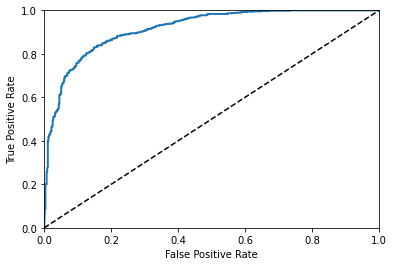

In [106]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
# plt.legend(loc="bottom right")
plt.show()

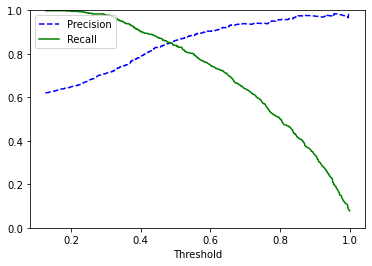

In [107]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]


# In[]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

# In[]:    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [111]:
y_test_rlt=grid_search.predict_proba(test_X)[:,1]

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_probas_forest_80=(y_probas_forest>0.8)

In [114]:
y_test_rlt_80=adjusted_classes(y_test_rlt,0.6)
print(precision_score(test_y,y_test_rlt_80))
print(recall_score(test_y,y_test_rlt_80))

0.8823529411764706
0.8108108108108109


In [115]:
y_predict=grid_search.predict(test_X)


# In[]:

print(precision_score(test_y,y_predict))
print(recall_score(test_y,y_predict))

0.8641975308641975
0.9459459459459459


In [118]:
# print(accuracy_score(test_y,y_predict_log))

In [ ]:
from sklearn.externals import joblib
joblib.dump(grid_search1,'grid_log_model.pkl')

## update model

In [46]:
import pandas as pd
import jieba
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# from sklearn.externals import joblib
#import traceback
# import src.data.data_load as ld_data
# import src.preprocess as prep
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
import numpy as np

In [8]:
filename='/Users/Joeyu/Desktop/ds project/remark_retrain/model/word2_model.model'

word2vec_model=KeyedVectors.load(filename, mmap='r')
def load_stop():
    with open(r'data/stopword.txt',encoding='utf8') as f:
        line_list=f.readlines()
        stopword_list=[k.strip() for k in line_list]
        stopword_set=set(stopword_list)
        print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
        print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))
    return stopword_set
stp_word=load_stop()

停顿词列表，即变量stopword_list中共有767个元素
停顿词集合，即变量stopword_set中共有749个元素


###  training data

In [10]:
rmk_cat=pd.read_excel(r'./data/remark_1000.xlsx',dtype={'custom_mark':'str'})

# confirm_result=pd.read_excel('oms_customer_remark_confirm.xlsx') model 0 ---'grid_log_model_10.pkl'

# confirm_result=pd.read_excel('oms_customer_remark_confirm.xlsx') 
# joblib.dump(grid_search,'grid_log_model_11.pkl') random forest



rmk_cat.head(2)

custom_mark  order_id  cat Unnamed: 3
0  送朋友的礼物 请确保产品包装干净完整 无破损?谢谢！  42651183    1        NaN
1               请检查是否有破损开线 谢谢  42651193    1        NaN

In [16]:
'''cut word'''

def blank_rm(blist:list):
    """去除list中的空格项/remove blank items in the list"""
    newlist=[]
    for item in blist:
       if (item != '') and (item!=' '):
           newlist.append(item)
    
    return newlist



def tokenizer_word(rmks,stopword_set,cut_mode=True):
    
    jieba.load_userdict(r'./data/myDict.txt')
    
    wordseg=[]
    for item in rmks:
        tempList=[]
        
        item=str(item)
        tempList=[word for word in jieba.cut(item,cut_all=cut_mode) if word not in stopword_set]
        newList=blank_rm(tempList)
        wordseg.append(newList)
    
    return wordseg

wordseg=tokenizer_word(rmk_cat['custom_mark'].tolist(),stp_word)

# [['送',
#   '朋友',
#   '礼物',
#   '请',
#   '确保',
#   '保产',
#   '产品',
#   '产品包装',
#   '包装',
#   '干净',


In [17]:
confirm_result=pd.read_excel('data/confirm_result_confirm10.xlsx')
confirm_result.head(2)

Unnamed: 0          createtime  custom_mark      order_bn    order_id  \
0         0.0 2019-10-12 00:01:26  请亲仔细检查质量，谢谢  6.601980e+17  48204811.0   
1         1.0 2019-10-12 00:01:45    请放在门卫  谢谢  6.600093e+17  48204823.0   

   invalid_remark confirmation Unnamed: 7  
0               1            Y        NaN  
1               0            Y        NaN

In [18]:
wordseg_1=tokenizer_word(confirm_result['custom_mark'].tolist(),stp_word)


In [19]:
wordseg.extend(wordseg_1)


In [21]:
# wordseg

In [49]:
# filename='/Users/Joeyu/Desktop/ds project/remark_retrain/model/word2_model.model'
# word2vec_model=KeyedVectors.load(filename, mmap='r')


word2vec_model = Word2Vec(wordseg, vector_size=200, window=10, min_count=1)


def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords]
    contentVector = np.array(vector_list).mean(axis=0)
    return contentVector
# cutWords=wordseg[0]

# vector_list = [word2vec_model.wv[k] for k in cutWords] #np array3
# vector_list
contentVector_list = []
for i in range(len(wordseg)):
    cutWords = wordseg[i]
#     print(cutWords)
    ctvector=get_contentVector(cutWords, word2vec_model)
    contentVector_list.append(ctvector)
X = np.array(contentVector_list)

In [51]:
train_rlt=confirm_result['invalid_remark']
y_old=rmk_cat['cat'].tolist()

In [53]:
train_rlt.shape

(685,)

In [56]:
y_old.extend(train_rlt.tolist())


In [59]:
log_clf = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

NameError: name 'LogisticRegression' is not defined

In [57]:
X.shape

(2038, 200)

In [58]:
hyperparameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(log_clf, hyperparameters, cv=5, iid=False,refit=True,scoring='precision_micro')

#lr.partial_fit(X,y_no)

grid_search.fit(X,y_old)

NameError: name 'C' is not defined

### input

In [60]:
pd.read_csv('data/X_s.csv')

0 ['送', '朋友', '礼物', '请', '确保', '产品包装', '干净', '完整', '无', '破损', '谢谢']
0        1            ['请', '检查', '是否', '破损', '开', '线', '谢谢']               
1        2  ['質量', '檢查', '一下', '請開', '發票', '弘威', '工程技术', '...               
2        3           ['盒子', '内', '不要', '放', '订单', '信息', '谢谢']               
3        4  ['发货', '前', '请', '检查', '清楚', '一定', '一定', '一定',...               
4        5                 ['不', '放', '价格', '单', '二维码', '红包']               
...    ...                                                ...               
2091  2092  ['增值税', '专用发票', '公司', '名称', '苏州市', '里', '湿地', ...               
2092  2093  ['请', '十一月', '十六号', '发货', '在此之前', '不', '在家', '...               
2093  2094                 ['这周', '出差', '请', '周四', '才', '发货']               
2094  2095                                  ['先', '发货', '谢谢']               
2095  2096                            ['请', '15', '天后', '发货']               

[2096 rows x 2 columns]

In [61]:
pd.read_csv('data/y_cat.csv')

0  1
0        1  1
1        2  1
2        3  0
3        4  1
4        5  0
...    ... ..
2091  2092  0
2092  2093  0
2093  2094  0
2094  2095  0
2095  2096  0

[2096 rows x 2 columns]

### output

In [ ]:
joblib.dump(grid_search,'grid_log_model_4.pkl')


## latest model

In [ ]:
def customer_service_predict(data):
    filename=r'./model/doc2_csmodel_0416.model'
    word2vec_model=KeyedVectors.load(filename, mmap='r')
    #query = pd.read_csv(r')
    lr = joblib.load(r'./model/doc_model_weighted_cs_02_0717.pkl')
    print ('Model loaded')
            #query = query.reindex(columns=model_columns, fill_value=0)
    stp_word=ld_data.load_stop()
    wordcat=prep.tokenizer_word(data['custom_mark'].tolist(),stp_word)
    
    X=prep.x_create(wordcat,word2vec_model)
    prediction = list(lr.predict(X))
    data.reset_index(drop=True,inplace=True)
    data['invalid_remark']=pd.Series(prediction)
    re_check=prep.reconfirm_deli(wordcat)
    #print(data[['seq_id','invalid_remark']])
    data['recheck']=pd.Series(re_check)
    data['invalid_remark']=data['invalid_remark']*data['recheck']
    #data['invalid_remark']=data['invalid_remark'].astype('int')
    return data[['seq_id','invalid_remark']]

